## 1. Scope The Project

Goal: To predict which Maven Music customers are most likely to cancel their subscriptions by analyzing the past three months of user behavior, including subscription patterns and listening history, in order generate actionable business insights, and inform targeted retention strategies.

The customer data includes the subscription and listening history.


## 2. Gather Data

There are two datasets: 

##### Customer data: maven_music_customers.csv
##### Listening history: maven_music_listening_history.xslx


The dataset used in this project was provided through a Udemy course on [Python Data Science: Data Prep & EDA with Python](https://www.udemy.com/course/data-science-in-python-data-prep-eda/?srsltid=AfmBOoqUzd9qwlxAtlDCwfd0nvb6J4K1so2AANmw9J-fYzrGrFiBedBr), containing three months of customer subscription and listening history for predictive analysis.


In [467]:
#Import the customer data from the csv file

import pandas as pd

customer_data = pd.read_csv('Datasets/maven_music_customers.csv')



In [468]:
customer_data.head(5)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


The listening history file has three sheets
1) listening_history sheet: Purpose: Records every audio track played by customers during their listening sessions
2) Audio_files:  Master catalog of all available audio content with metadata
3) Session Log-in Time: Tracks when customers start their listening sessions

In [470]:
#Import the listening history from the xslx file

listening_history = pd.read_excel('Datasets/maven_music_listening_history.xlsx')

In [471]:
listening_history.head(5)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [472]:
#Import the audio data from the xslx file

audio_data = pd.read_excel('Datasets/maven_music_listening_history.xlsx',sheet_name=1)

In [473]:
audio_data.head(5)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [474]:
#Import the session data from the xslx file

sessions_data = pd.read_excel('Datasets/maven_music_listening_history.xlsx',sheet_name=2)

In [475]:
sessions_data.head(5)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

To ensure data quality and reliable analytics, we can do the following checks

#### a) Datatype checking

In [478]:
#check datatypes

customer_data.dtypes


Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

From the below response, the datatype of:
- "Member Since" should be DateTime
- "Subscription rate" should be numeric
- "Cancellation Date" should be DateTime

In [480]:
customer_data["Member Since"]=pd.to_datetime(customer_data["Member Since"])
customer_data["Subscription Rate"]=pd.to_numeric(customer_data["Subscription Rate"].str.replace("$",""))
customer_data["Cancellation Date"]=pd.to_datetime(customer_data["Cancellation Date"])


C:\Users\mahit\AppData\Local\Temp\ipykernel_30064\300604855.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data["Member Since"]=pd.to_datetime(customer_data["Member Since"])
C:\Users\mahit\AppData\Local\Temp\ipykernel_30064\300604855.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_data["Cancellation Date"]=pd.to_datetime(customer_data["Cancellation Date"])


In [481]:
customer_data.dtypes # the datatypes all look good now!

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [482]:
customer_data.head(5)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [483]:
listening_history.dtypes
#from the below output, there is nothing wrong with the datatypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [484]:
audio_data.dtypes
#from the below output, there is nothing wrong with the datatypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [485]:
sessions_data.dtypes
#from the below output, there is nothing wrong with the datatypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

#### b) Checking for missing data, typos,duplicate data and outliers

In [487]:
# missing data:

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


##### From the above output, we can see that there are 30 entries but three columns have a few null values  

In [489]:
listening_history.info() # there are no NaNs in this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [490]:
audio_data.info() # data look good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [491]:
sessions_data.info() # data look good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [492]:
#Since the customer data has null values in the Subscription Plan,Discount? and Cancellation Date field
customer_data[customer_data['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


##### From the above data, all the Subscription Plans that are NaN have the rate of 2.99.

Next Step: Figure out the name of the plan for that specific rate


In [494]:
customer_data[["Subscription Plan","Subscription Rate"]].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


##### Fill all missing values in the 'Subscription Plan' column with the default "Basic (Ads)" plan 

In [496]:
customer_data["Subscription Plan"]=customer_data["Subscription Plan"].fillna("Basic (Ads)")

In [497]:
customer_data.head(5)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [498]:
print(customer_data["Discount?"])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    Yes
22    Yes
23    Yes
24    NaN
25    Yes
26    Yes
27    NaN
28    Yes
29    Yes
Name: Discount?, dtype: object


In [499]:
# from the above output, there are a few "Yes" values. 
#preliminary idea: The NaNs might be "No"

customer_data['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [500]:
customer_data['Discount?'] = np.where(customer_data['Discount?'].isna(),0,1)


In [501]:
customer_data.head(5)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


##### If cancellation date is NaT, it means it's not cancelled yet. That's good!. We do not need to change this data

In [503]:
#Typos and inconsistent values

customer_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [504]:
# From the above response, the max value is very high compared to the other values.
# # This is also clear from the previously observed unique subscription plan and rate pairs.

customer_data[customer_data['Subscription Rate']>7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [505]:
customer_data.iloc[15,5]=9.99

In [506]:
customer_data[customer_data['Subscription Rate']>9.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [507]:
#the email column has the prefix "email:" for every value
customer_data
customer_data["Email"]=customer_data.Email.str[6:]
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [508]:
customer_data


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT


In [509]:
listening_history.describe() # the output looks fine, nothing stands out as inconsistent

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [510]:
audio_data.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [511]:
audio_data.value_counts()

ID           Name                         Genre       Popularity
Podcast-201  Jokes on Jokes               Comedy      2             1
Song-105     Pop Rocks                    Pop Music   52            1
Song-111     Moonlit Serenade             Jazz        63            1
Song-110     Boss Moves                   Hip Hop     28            1
Song-109     Rise Above                   Hip Hop     9             1
Song-108     Chase the Dream              Hip Hop     4             1
Song-107     Dirt Road Romance            Country     30            1
Song-106     My Old Dog and My True Love  Country     23            1
Song-104     Glowing Hearts               Pop Music   10            1
Podcast-202  Laugh Out Loudcast           Comedy      8             1
Song-103     Sunset Boulevard             Pop Music   5             1
Song-102     Unbreakable Beat             Pop         2             1
Song-101     Dance All Night              Pop         1             1
Podcast-205  Investigatin

In [512]:
audio_data

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [513]:
# In Genre there are two values "Pop" and "Pop Music"
import numpy as np
audio_data["Genre"]=np.where(audio["Genre"]=="Pop Music","Pop",audio["Genre"])


In [514]:
audio_data.head(6)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23


In [515]:
sessions_data

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00
...,...,...
85,111263,2023-05-20 15:17:30
86,111273,2023-05-20 16:01:00
87,111282,2023-05-23 23:51:00
88,111286,2023-05-27 02:15:00


In [516]:
sessions_data["Session Log In Time"].describe()

count                               90
mean     2023-04-27 08:18:34.000000512
min                2023-03-13 14:14:00
25%                2023-04-05 21:21:30
50%                2023-05-03 20:03:00
75%                2023-05-18 22:17:30
max                2023-05-31 06:03:00
Name: Session Log In Time, dtype: object

In [517]:
#outliers
customer_data.describe()   # no outliers, already took care of them

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [518]:
listening_history.describe()   # no outliers, already took care of them

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [519]:
audio_data.describe()   # no outliers, already took care of them

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [520]:
sessions_data.describe()   # no outliers, already took care of them

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


## 4. Exploratory Data Analysis

Goal:To better understand the customers who cancelled:

- How long they were members before they cancelled?
- What % of customers who cancelled had discount vs those who did not have discount
- What plan did the customers who cancelled mostly belong to

In [523]:
#To better understand who cancelled the subscription: 
customer_data["Cancelled"]=np.where(customer_data["Cancellation Date"].notna(),1,0)
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [524]:
#all the customers who cancelled
customer_cancel=customer_data[customer_data["Cancelled"] == 1]
customer_cancel

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [525]:
#Insight number 1
customer_cancel["Subscription Plan"].value_counts()

Subscription Plan
Premium (No Ads)    9
Basic (Ads)         4
Name: count, dtype: int64

In [526]:
customer_cancel[customer_cancel['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [527]:
customer_cancel["Cancellation Date"]-customer_cancel["Member Since"]

2    80 days
5    75 days
7    72 days
12   65 days
13   61 days
15   57 days
19   46 days
22   32 days
23   32 days
25   24 days
26   24 days
28   18 days
29   16 days
dtype: timedelta64[ns]

In [528]:
# Insight number 2 
(customer_cancel["Cancellation Date"]-customer_cancel["Member Since"]).mean()

Timedelta('46 days 07:23:04.615384615')

In [529]:
discount_yes=customer_data[customer_data["Discount?"]=="Yes"]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled


In [530]:
discount_no=customer_data[customer_data["Discount?"]=="No"]
discount_no

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled


In [531]:
#Insight number 3
customer_data.loc[customer_data["Cancelled"] == 1, "Discount?"].value_counts()

Discount?
0    7
1    6
Name: count, dtype: int64

In [532]:
#Insight number 4
discount_yes.Cancelled.sum()/discount_yes.Cancelled.count()

C:\Users\mahit\AppData\Local\Temp\ipykernel_30064\3749030317.py:2: RuntimeWarning: invalid value encountered in scalar divide
  discount_yes.Cancelled.sum()/discount_yes.Cancelled.count()


nan

In [533]:
#Insight numbber 5
discount_no.Cancelled.sum()/discount_no.Cancelled.count()

C:\Users\mahit\AppData\Local\Temp\ipykernel_30064\1494323570.py:2: RuntimeWarning: invalid value encountered in scalar divide
  discount_no.Cancelled.sum()/discount_no.Cancelled.count()


nan

From the above 5 insights, we can derive the following assumptions:
- Premium users seem to be cancelling more than Basic users, suggesting potential retention issues with the premium plan.
- A lot of users who cancelled did so after about 46 days, so churn seems to happen around the middle of the 3 months.
Because we only have 3 months of data, we can’t accurately tell what happens with users in the long run. We need to collect more data
- Those with discount have a higher cancellation rate than those without discount. This makes sense because, the customers might've only subscribed due to a discount
    



In [535]:
#to better understand customer's listening history: combine listening_history and audio_data
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [536]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [537]:
audio_data

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [538]:
# audio_data and listening_history can be joined on Audio ID  column

audio_id_clean=pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type',1:'Audio ID'})
audio_id_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [539]:
audio_new=pd.concat([audio_id_clean,audio_data],axis=1)

In [540]:
audio_new.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [541]:
audio_new['Audio ID']=audio_new['Audio ID'].astype('int')
audio_new

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52
5,Song,106,Song-106,My Old Dog and My True Love,Country,23
6,Song,107,Song-107,Dirt Road Romance,Country,30
7,Song,108,Song-108,Chase the Dream,Hip Hop,4
8,Song,109,Song-109,Rise Above,Hip Hop,9
9,Song,110,Song-110,Boss Moves,Hip Hop,28


In [542]:
df=listening_history.merge(audio_new,how='left',on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [543]:
# Insight number 6
grouped=df.groupby('Customer ID')['Session ID'].nunique()
grouped

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

<Axes: ylabel='Frequency'>

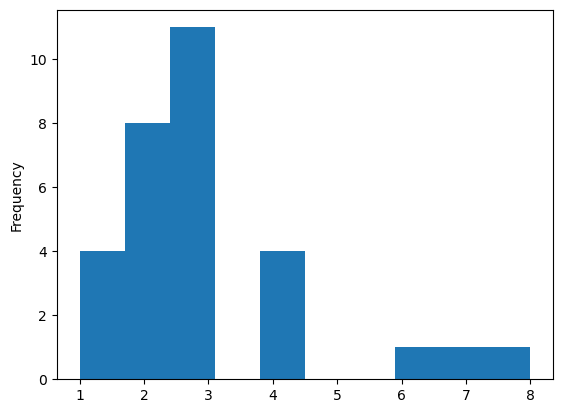

In [544]:
grouped.plot.hist()

In [545]:
#Insight number 7
df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

Insights:
- Most people have 2-3 sessions.Low-session users can be targeted with emails, reminders, or incentives to increase engagement and reduce cancellations
- Most people listen to pop Genre. Could help customer retention by running special promotions or content for those users

 ## 5. Preparation for Modelling

To prepare for visualization:
Make a table dataframe with the following fields:
- Customer ID
- Cancelled or not
- Received discount or not
- Number of sessions
- Since pop is highest, % of listening history is pop
- % of listening history are podcasts
          

In [549]:
table_df=customer_data[["Customer ID","Cancelled","Discount?"]]
table_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [550]:
number_of_sessions=df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [551]:
table_df=table_df.merge(number_of_sessions,how='left',on='Customer ID')

In [552]:
table_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [553]:
pd.get_dummies(df.Genre) # to make categorical data numeric

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
500,False,False,False,True,False,False
501,True,False,False,False,False,False
502,False,False,True,False,False,False
503,False,False,True,False,False,False


In [554]:
pd.concat([df['Customer ID'],pd.get_dummies(df.Genre)],axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,False,False,False,False,True,False
1,5001,False,False,False,False,True,False
2,5001,False,False,False,False,True,False
3,5001,False,False,False,False,True,False
4,5001,False,False,False,False,True,False
...,...,...,...,...,...,...,...
500,7579,False,False,False,True,False,False
501,6588,True,False,False,False,False,False
502,5763,False,False,True,False,False,False
503,5763,False,False,True,False,False,False


In [555]:
genres=pd.concat([df['Customer ID'],pd.get_dummies(df.Genre)],axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [556]:
total_audio=listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [557]:
df_audio=genres.merge(total_audio,how="left",on="Customer ID")
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [558]:
table_df['Pop percent']=df_audio.Pop/df_audio['Total Audio'] *100
table_df.head()


,Customer ID,Cancelled,Discount?,Number of Sessions,Pop percent
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [559]:
table_df['Podcast percent']=((df_audio['Comedy']+df_audio['True Crime'])/df_audio['Total Audio']) *100
table_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Pop percent,Podcast percent
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


In [560]:
table_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Pop percent,Podcast percent
0,5001,0,0,8,56.666667,0.000000
1,5002,0,0,4,0.000000,0.000000
2,5004,1,0,1,100.000000,0.000000
3,5267,0,0,7,51.111111,0.000000
4,5338,0,0,4,0.000000,0.000000
5,5404,1,0,1,100.000000,0.000000
6,5581,0,0,3,0.000000,100.000000
7,5759,1,0,2,100.000000,0.000000
8,5761,0,0,3,0.000000,100.000000
9,5763,0,0,6,64.516129,0.000000


In [561]:
import seaborn as sns

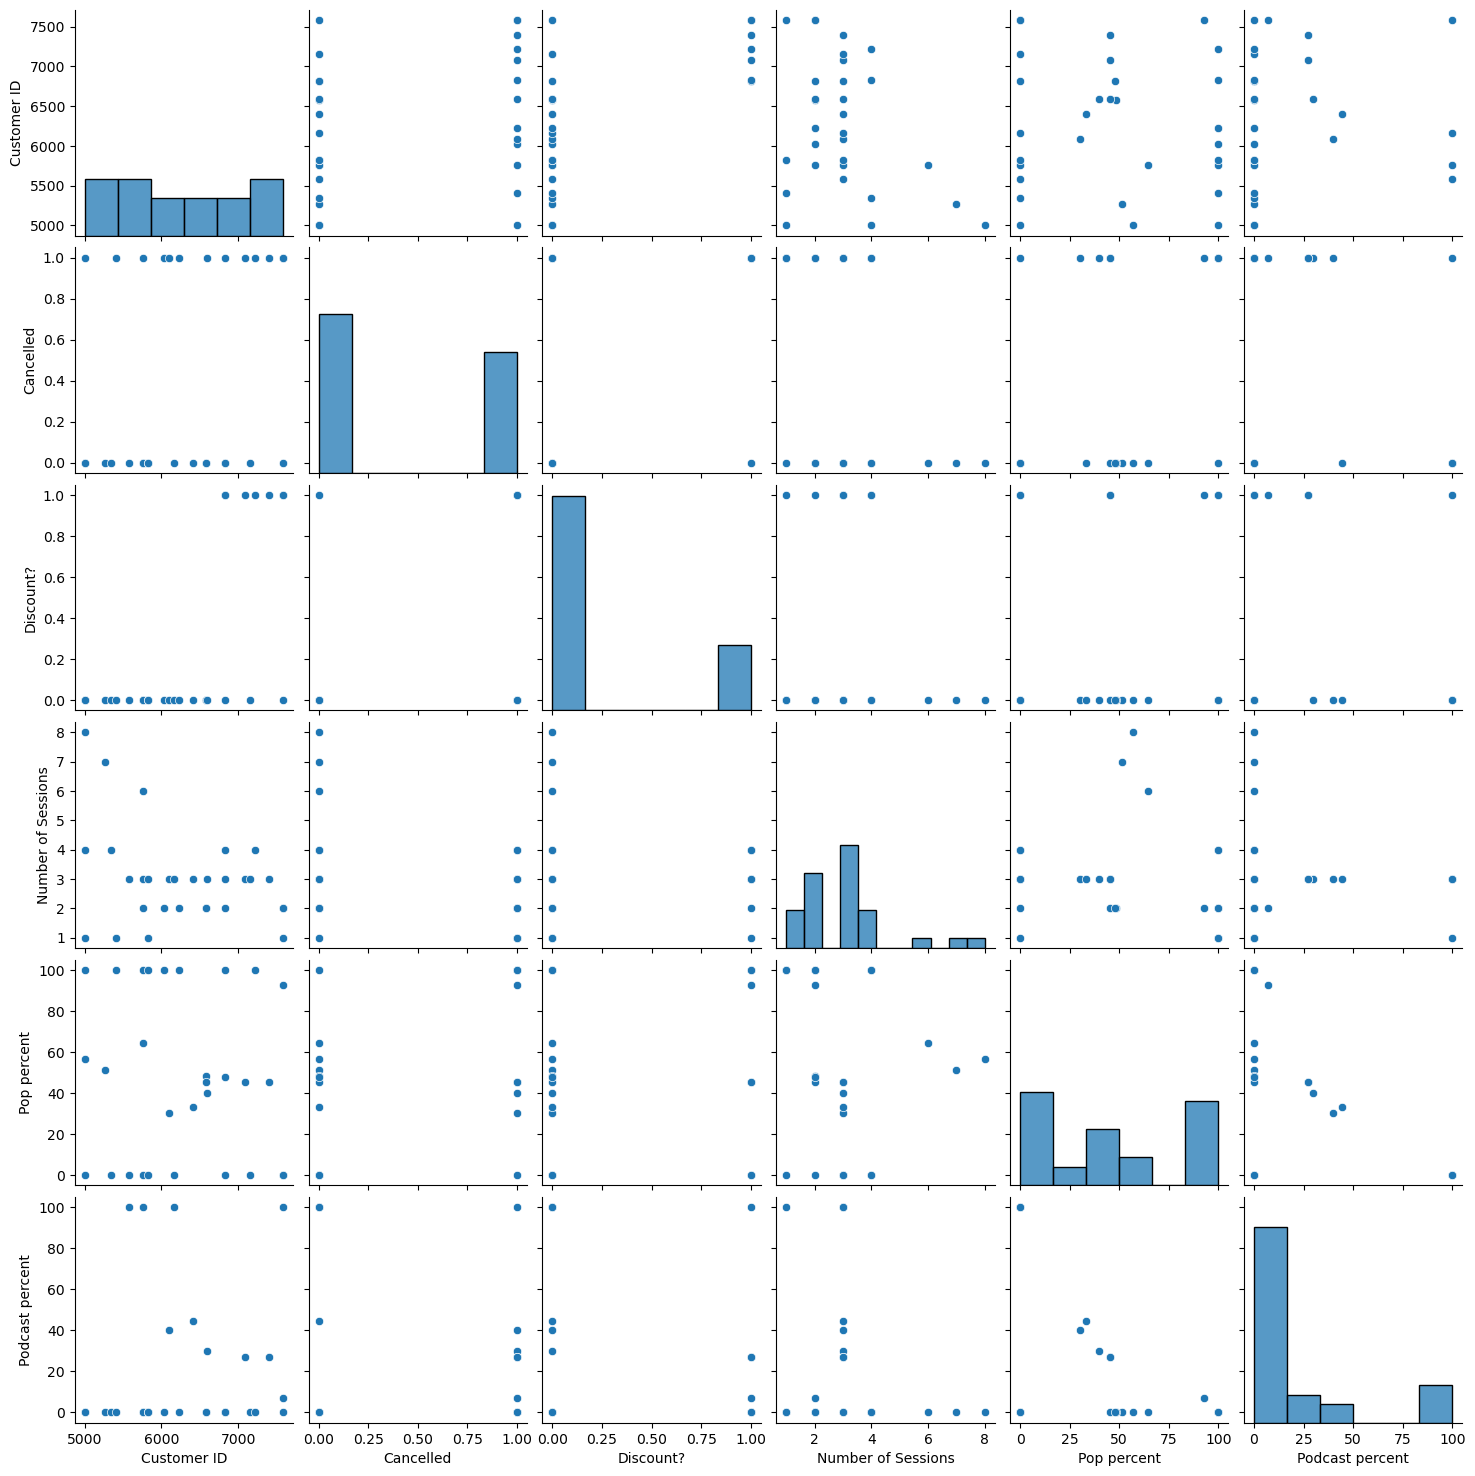

In [562]:
sns.pairplot(table_df) # since we dont have much data , hard to see any trends/correlations

In [563]:
table_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Pop percent,Podcast percent
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Pop percent,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Podcast percent,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


## Final Observations

- Discount is positively correlated with Cancellation
- Number of listening sessions is negatively correlated with Cancellation
- The more pop music, the more cancellation
- Inconclusive details from podcast listening history ( unrelated to cancellation)